# Faces

In [1]:
from time import time

import numpy as np
import pandas as pd
import sqlite3
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox

from IPython.display import Image

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)
import sklearn

n_neighbors = 10

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

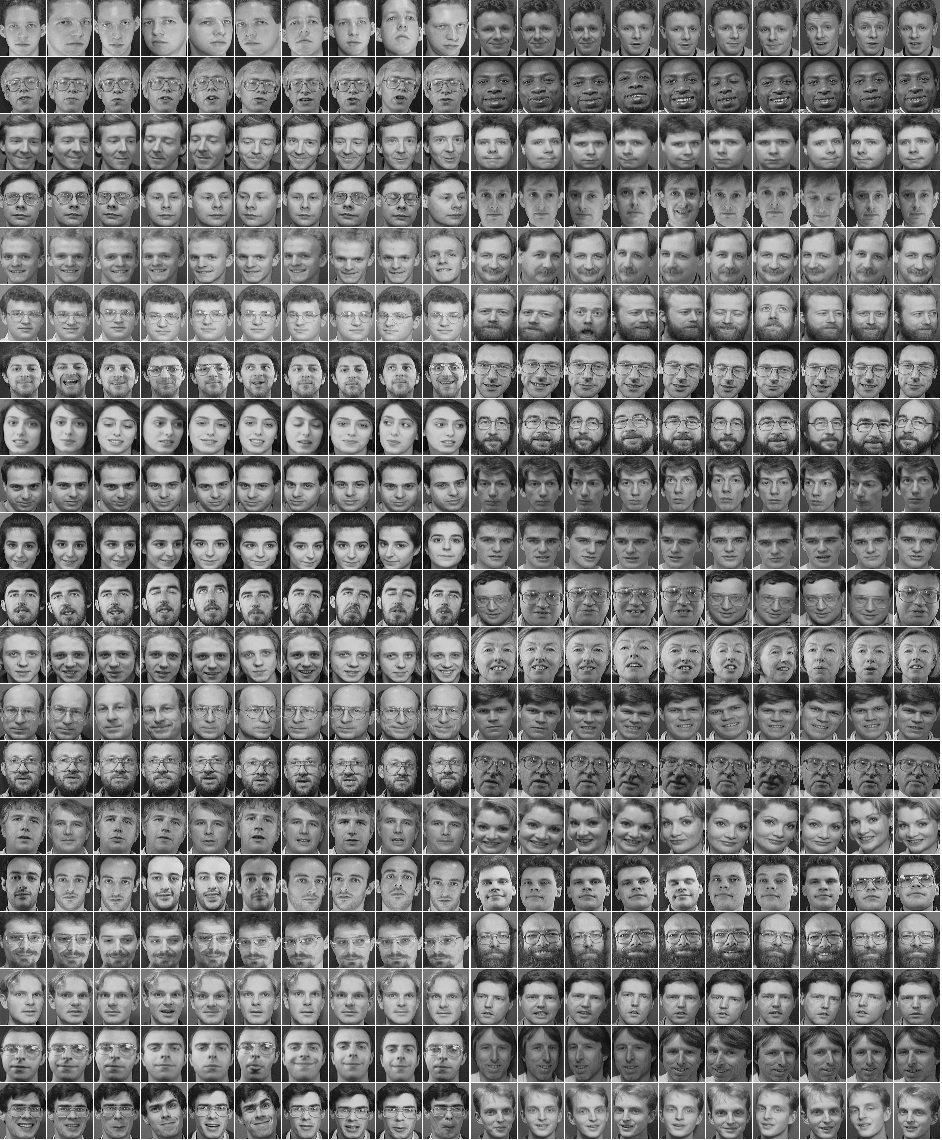

In [3]:
# show faces images
Image(filename='faces.png')

In [4]:
data = sklearn.datasets.fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)

In [20]:
X_full = data.images.reshape(data.images.shape[0],-1)
X_full = pd.DataFrame(X_full)
X = decomposition.TruncatedSVD(n_components=30).fit_transform(X_full)
y = data.target

(400, 30)


In [40]:
def plot_embedding(X, ax, title=None, classes=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    if classes is None:
        classes = range(40)
    
    n_lab = len(np.unique(y))
    for i in range(X.shape[0]):
        if np.in1d(y[i], classes)[0]:
            ax.scatter(X[i, 0], X[i, 1], marker='o',s=20, color=plt.cm.Set1(y[i] / n_lab))        
    
    ax.set_xticks([]), ax.set_yticks([])

    if title is not None:
        ax.set_title(title)

1\. Perplexity parameter: choose init=random, random_state=0 and n_iter=1000. Show five plots in a row of the map points for the values of the perplexity parameter 10, 20, 30, 40 and 50, respectively. Display also the resulting values of the Kullback-Lieber divergence. Discuss the results.

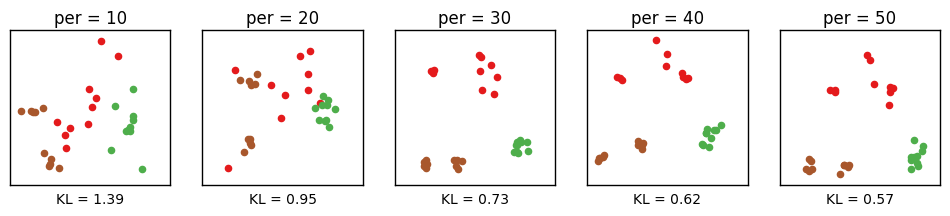

In [64]:
perplexities = [10, 20, 30, 40, 50]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,2))

for i in range(len(perplexities)):
    tsne = manifold.TSNE(n_components=2, perplexity=perplexities[i], init='random', random_state=0, n_iter=1000)
    Y = tsne.fit_transform(X)
    title = 'per = %d' % perplexities[i]
    plot_embedding(Y, ax[i], classes=[0, 10, 30], title=title)
    ax[i].set_xlabel('KL = %.2f' % tsne.kl_divergence_)

plt.show()

2\. Initial state: do the same as in item 1 but for the value of perplexity parameter fixed to 40 and for varying random_state by setting it to 0, 1, 2, 3 and 4 for the five plots, respectively. Discuss the results.

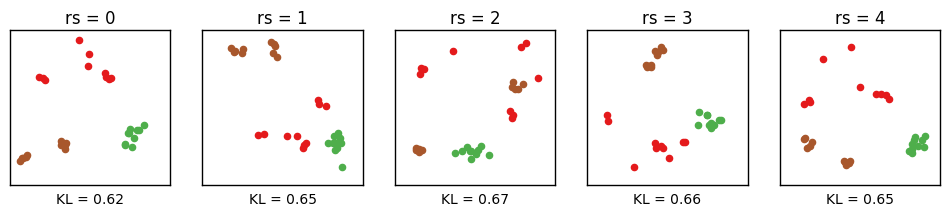

In [60]:
rs = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,2))

for i in range(len(rs)):
    tsne = manifold.TSNE(n_components=2, perplexity=40, init='random', random_state=rs[i], n_iter=1000, n_iter_without_progress = 2000)
    Y = tsne.fit_transform(X)
    title = 'rs = %d' % rs[i]
    plot_embedding(Y, ax[i], classes=[0, 10, 30], title=title)
    ax[i].set_xlabel('KL = %.2f' % tsne.kl_divergence_)

plt.show()

3\. Number of iterations: do the same as in item 1, but for the value of perplexity parameter fixed to 40 and for varying n_iter by setting it to 250, 500, 1000, 1500 and 2000 for the five plots, respectively. Discuss the results.

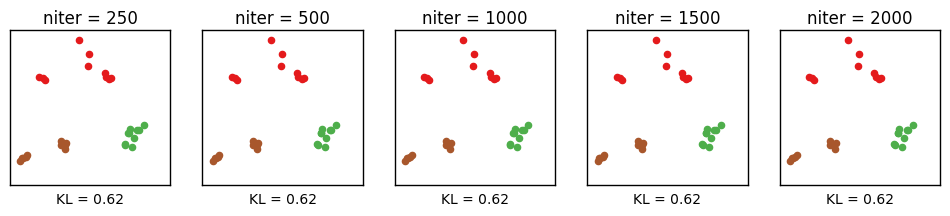

In [63]:
niter = [250, 500, 1000, 1500, 2000]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,2))

for i in range(len(niter)):
    tsne = manifold.TSNE(n_components=2, perplexity=40, init='random', random_state=0, n_iter=niter[i], n_iter_without_progress = 2000)
    Y = tsne.fit_transform(X)
    title = 'niter = %d' % tsne.n_iter
    plot_embedding(Y, ax[i], classes=[0, 10, 30], title=title)
    ax[i].set_xlabel('KL = %.2f' % tsne.kl_divergence_)

plt.show()